In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit


In [2]:
@jit
def bif(start, stop, n):
    data = []
    m = 500
    r = np.linspace(start, stop, n)
    y = np.zeros((m - 400))
    y_copy = np.copy(y)
    x = 0.02381
    x_copy = x

    for i in r:
        r_value = i
        for j in range(m):
            x = i * x * (1 - x)
            if j >= 400:
                y[j - 400] = x
        R = r_value * np.ones((len(y)))
        data.append((R, y))
        y = np.copy(y_copy)
        x = x_copy

    return data


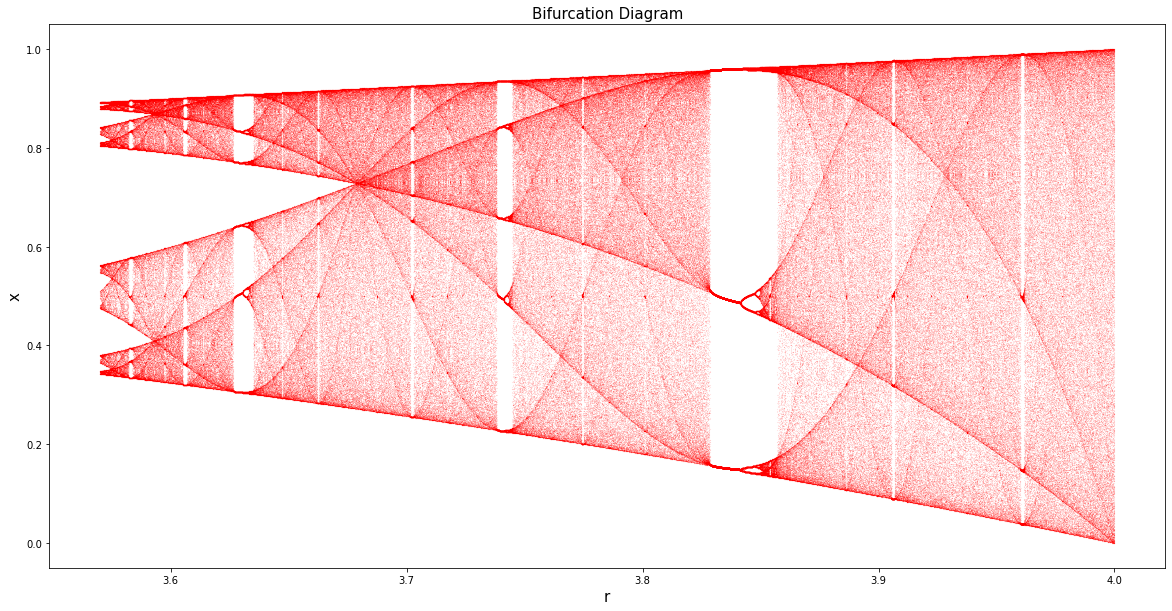

In [4]:
start = 3.57
stop = 4
res = 10000
data = bif(start, stop, res)
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.facecolor"] = 'w'
for k in data:
    plt.scatter(k[0], k[1], s=0.001, color="red")
plt.title("Bifurcation Diagram", fontsize=15)
plt.xlabel("r", fontsize=15)
plt.ylabel("x", fontsize=15)
plt.savefig(f"Bifurfaction diagram {start} to {stop}.png", dpi=300)
plt.show()


In [5]:
%timeit bif(start,stop,res)

2.18 ms ± 63.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


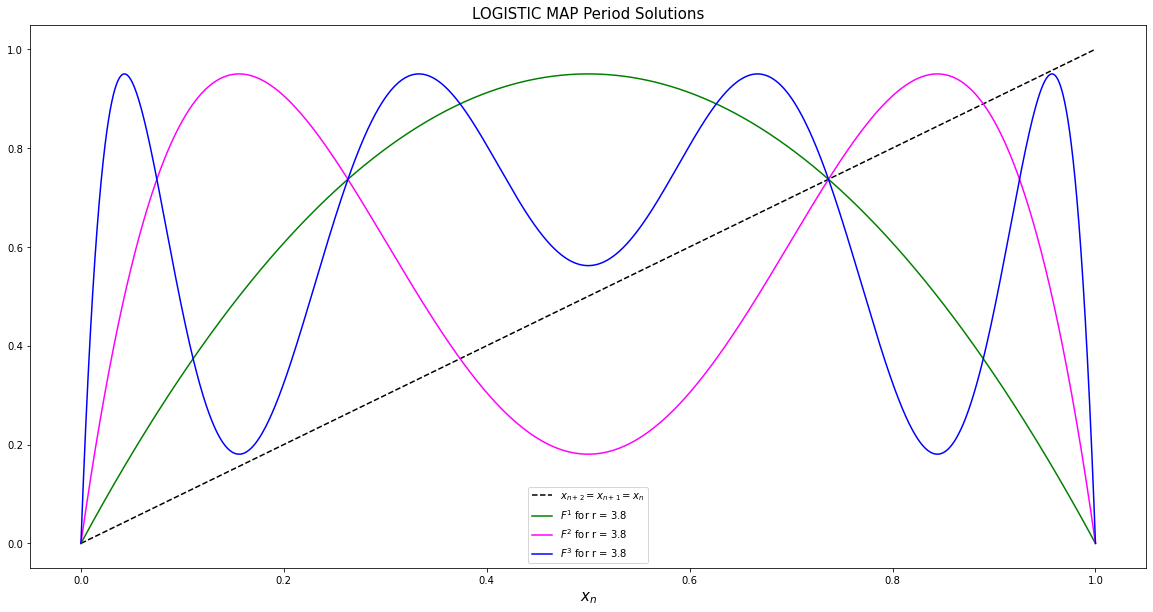

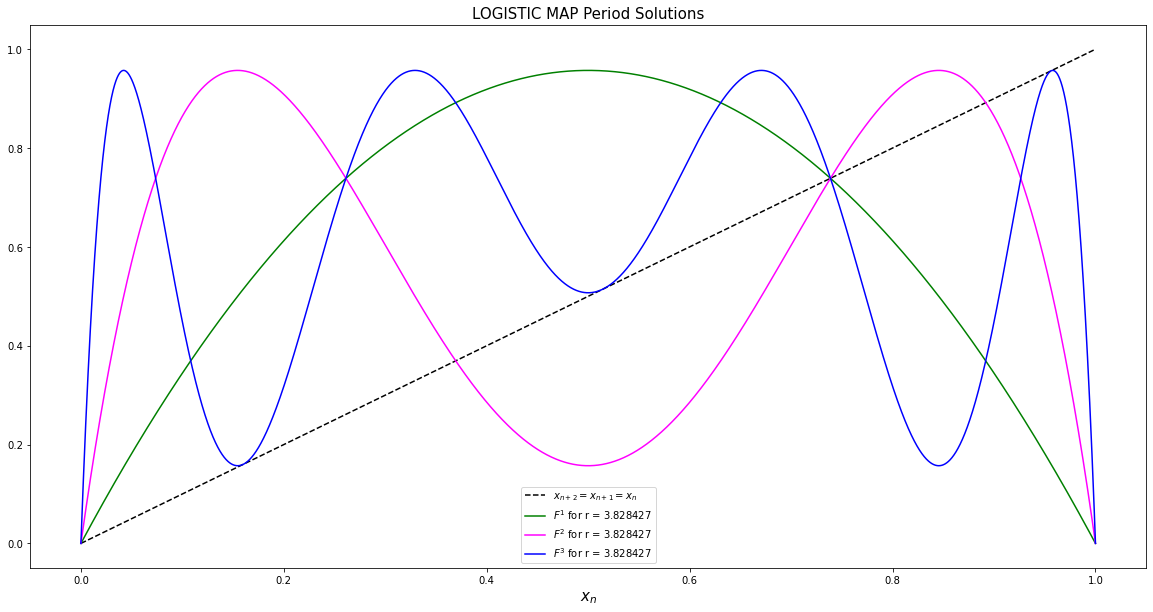

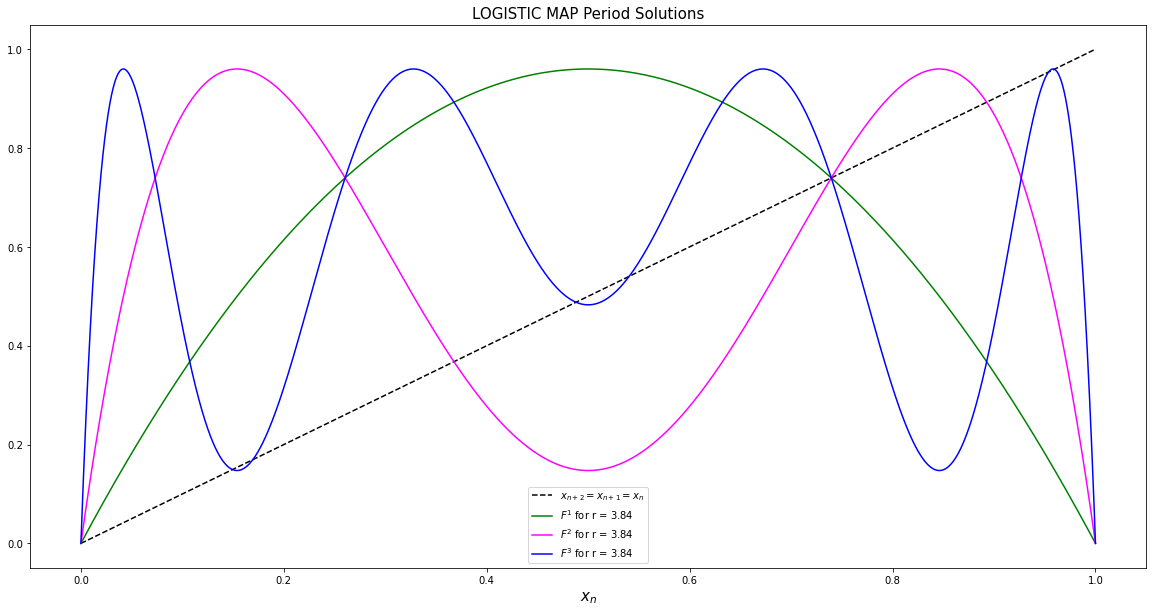

In [6]:
n = 100000
x = np.linspace(0, 1, n)
x_copy = np.copy(x)
r = [3.8, 3.828427, 3.84]
color = ["green", "magenta", "blue"]
data = np.zeros(np.size(x))
for j in range(len(r)):
    plt.plot(x_copy, x_copy, "--", color="black", label=r"$x_{n+2}=x_{n+1}=x_{n}$")
    for i in range(3):
        data = r[j] * x * (1 - x)
        x = r[j] * x * (1 - x)
        plt.plot(x_copy, data, color[i], label=r"$F^{}$ for r = {}".format(i + 1, r[j]))
        plt.legend(loc="best")
    plt.title("LOGISTIC MAP Period Solutions", fontsize=15)
    plt.xlabel(r"$x_{n}$", fontsize=15)
    plt.show()
    data = np.zeros((np.size(x)))
    x = np.linspace(0, 1, n)


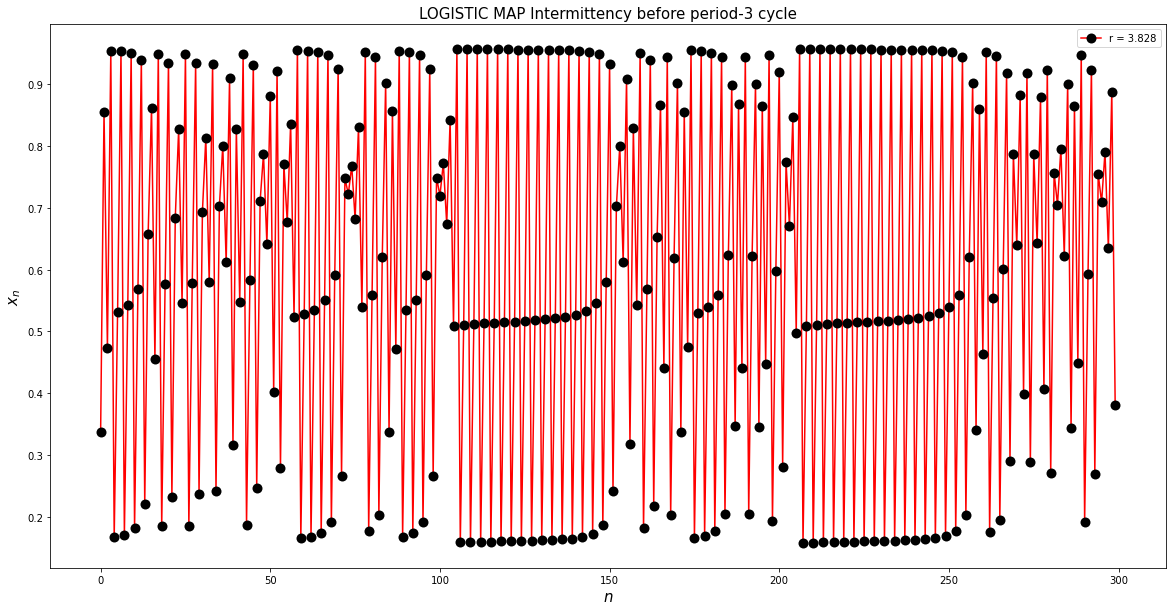

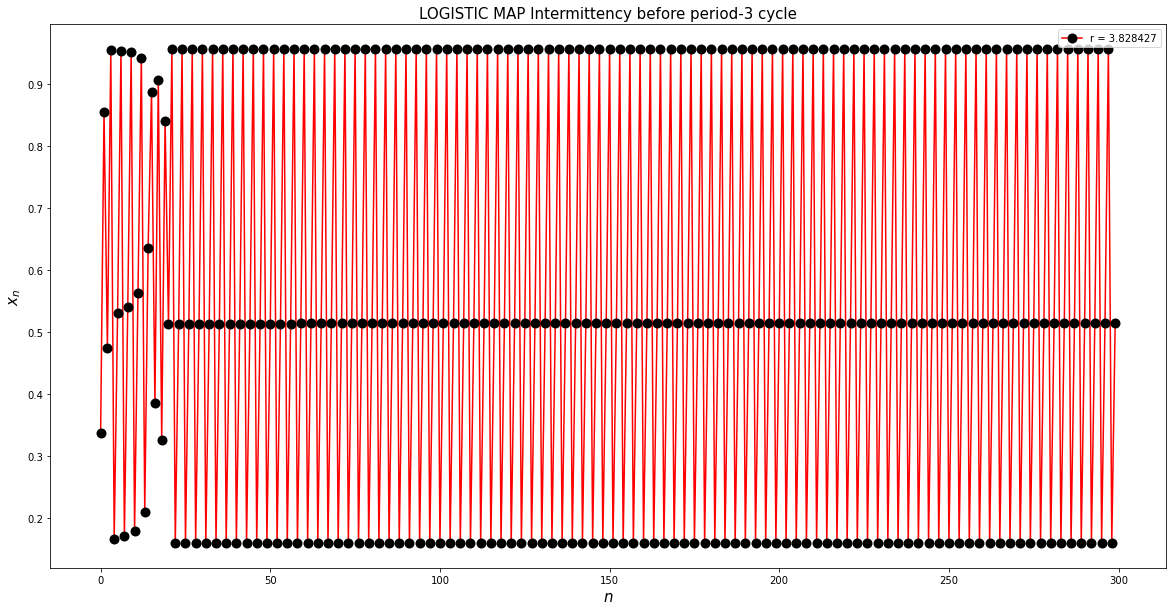

In [7]:
n = 300
x = 0.337
r = [3.828, 3.828427]
data = np.zeros((n))
for j in range(len(r)):
    for i in range(n):
        data[i] = x
        x = r[j] * x * (1 - x)

    plt.plot(
        data,
        "r",
        marker="o",
        mfc="black",
        mec="none",
        label="r = {}".format(r[j]),
        ms=10,
    )
    plt.title("LOGISTIC MAP Intermittency before period-3 cycle", fontsize=15)
    plt.legend(loc="best")
    plt.xlabel(r"$n$", fontsize=15)
    plt.ylabel(r"$x_{n}$", fontsize=15)
    data = np.zeros((n))
    x = 0.337
    plt.show()
